<div><span style="background-color: #9e4244; padding-top: 80px; padding-right: 20px; padding-bottom: 50px; padding-left: 20px; color: white; font-size: 22px; font-weight: bold">Session 3: Tree-Based Ensemble Models</span></div>

by BYJ Cirio

<div class="alert alert-danger alert-info">
     In this notebook you will be learning the different tree-based ensemble models. Specifically, the topics covered are as follows:<br>
    <ol>
        <li>Decision-Tree</li>
        <li>Random Forest</li>
        <li>Gradient Boosting</li>
        <li><i>Exercise: Further hypertune the tree-based ensemble models</i></li>
    </ol>
</div>

In [7]:
# general libraries
import warnings
import numpy as np
import pandas as pd
from tqdm.notebook import tqdm
from collections import Counter
warnings.filterwarnings("ignore")

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from nltk.corpus import stopwords

# modelling
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

import pickle

In [8]:
df = pd.read_csv('cc_df.csv', nrows=100000)
df.head()

,lat,long,city_pop,amt,is_fraud,merch_lat,merch_long,trans_day,age,gender_F,...,trans_month__Mar,trans_month__May,trans_month__Nov,trans_month__Oct,trans_month__Sep,part_of_day_afternoon,part_of_day_breakfast,part_of_day_dinner,part_of_day_early morning,part_of_day_lunch
0,9.65,123.85,105051,825.04,1,9.265518,123.368859,13,60,0,...,0,0,0,0,0,0,0,1,0,0
1,9.65,123.85,105051,306.55,1,9.236416,124.337292,12,60,0,...,0,0,0,0,0,0,0,0,1,0
2,9.65,123.85,105051,346.48,1,9.460644,124.461767,12,60,0,...,0,0,0,0,0,0,0,0,0,1
3,9.65,123.85,105051,919.50,1,10.606020,123.930862,12,60,0,...,0,0,0,0,0,0,0,0,1,0
4,9.65,123.85,105051,1131.45,1,8.806183,123.719528,13,60,0,...,0,0,0,0,0,0,0,1,0,0


Would Recommend:       0
1    924
0  99076
Proportion Chance Criterion: 98.17%
1.25 * Proportion Chance Criterion: 122.71%


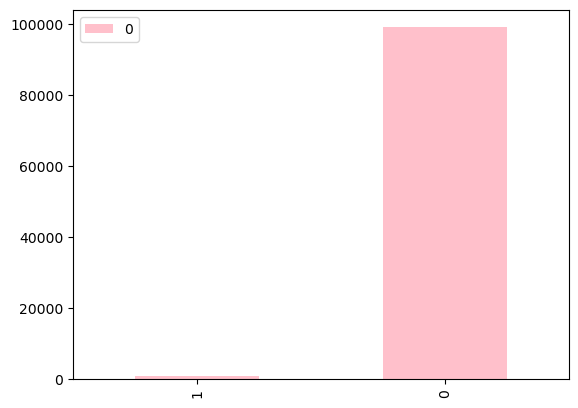

In [9]:
state_counts = Counter(df['is_fraud'])
df_state = pd.DataFrame.from_dict(state_counts, orient='index')
df_state.plot(kind='bar', color='pink')

num=(df_state[0]/df_state[0].sum())**2

print("Would Recommend:{}".format(df_state))

print("Proportion Chance Criterion: {:0.2f}%".format(100*num.sum()))
print("1.25 * Proportion Chance Criterion: {:0.2f}%".format(1.25*100*num.sum()))

In [10]:
# Setting random state
RNDM_STATE = 42

In [11]:
X = df.drop(['is_fraud'], axis=1)
y = df['is_fraud']
(X_train, X_test, y_train, y_test) = train_test_split(X, 
                                                    y, 
                                                    random_state=RNDM_STATE, 
                                                    test_size=0.25)

💡 **Random Forest** and **Gradient Boosting Method** are ensemble decision tree models that aims to improve decision trees **generalization capability** however it suffers from difficulty of **interpreting** the important features of a standard decision tree model.

<div><span style="background-color: #ff0257; padding-top: 100px; padding-right: 20px; padding-bottom: 50px; padding-left: 20px; color: #FFFAF0; font-size: 18px; font-weight: bold">Random Forest </span></div>

<b>Random forest</b> get their name from injecting randomness into the tree building to ensure each tree is different. There are two ways in which the trees in a random forest are randomized: by selecting the data points used to build a tree and by selecting the features in each split test

<i>n_estimator</i>- number of trees to build <br>
<i>max_features</i>- amount of features that is randomly selected

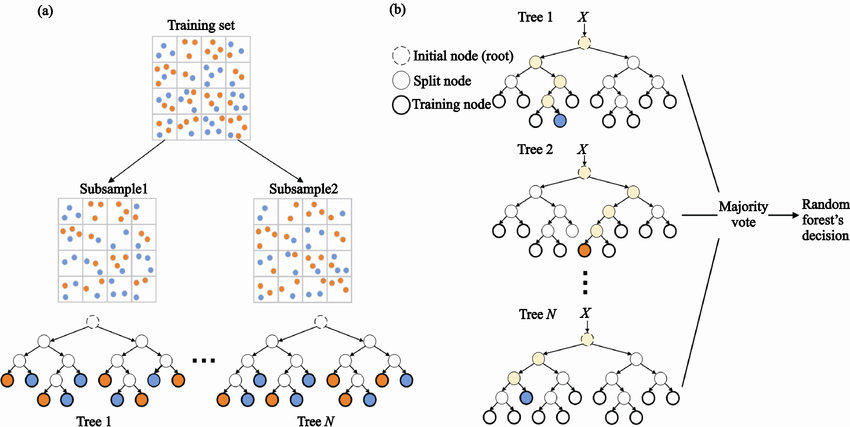

In [12]:
rf = RandomForestClassifier(random_state=RNDM_STATE)
rf.fit(X_train, y_train)

print(f'Accuracy on training set: {rf.score(X_train, y_train):.4%}')
print(f'Accuracy on test set: {rf.score(X_test, y_test):.4%}')

Accuracy on training set: 100.0000%
Accuracy on test set: 99.6320%


<u>Advantages</u>:

(1) Work well without heavy tuning of the parameters <br>
(2) Invariant to scaling of the data

<u>Disadvantages</u>:

(1) Might be longer to run than the decision tree <br>

# Random Forest Hyperparameter Tuning

### Using '**max_depth**' and '**n_estimators**' parameters

In [13]:
all_training = pd.DataFrame()
all_test = pd.DataFrame()

max_depth_settings = range(1, 11)
for depth in tqdm(max_depth_settings):
    (X_train, X_test, y_train, y_test) = train_test_split(X, 
                                                    y, 
                                                    random_state=RNDM_STATE, 
                                                    test_size=0.25)
    
    training_accuracy = []
    test_accuracy = []
    n_estimators_settings = range(1, 11)
    for trees_n in tqdm(n_estimators_settings):
        rf_depth_estimators = RandomForestClassifier(max_depth=depth, n_estimators=trees_n, random_state=RNDM_STATE)
        rf_depth_estimators.fit(X_train, y_train)
        
        training_accuracy.append(rf_depth_estimators.score(X_train, y_train))
        test_accuracy.append(rf_depth_estimators.score(X_test, y_test))
        
    all_training[depth] = training_accuracy
    all_test[depth] = test_accuracy

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

In [14]:
display(all_training, all_test)

,1,2,3,4,5,6,7,8,9,10
0,0.990933,0.990973,0.991067,0.991053,0.991253,0.991427,0.992653,0.991547,0.991427,0.991480
1,0.990933,0.990973,0.991080,0.991213,0.991560,0.991773,0.991853,0.991827,0.991813,0.991907
2,0.990933,0.990933,0.990933,0.990960,0.990960,0.991053,0.991213,0.991053,0.990987,0.991147
3,0.990933,0.990933,0.990973,0.990987,0.991160,0.991240,0.991213,0.991227,0.991240,0.991307
4,0.990933,0.990933,0.990933,0.990973,0.990987,0.990947,0.991053,0.990987,0.990947,0.991133
5,0.990933,0.990933,0.990933,0.990973,0.990987,0.990973,0.991067,0.991093,0.991000,0.991160
6,0.990933,0.990933,0.990933,0.990973,0.990987,0.990960,0.991227,0.991160,0.991133,0.991213
7,0.990933,0.990933,0.990933,0.990973,0.991013,0.991013,0.991320,0.991240,0.991280,0.991307
8,0.990933,0.990933,0.990933,0.990987,0.990987,0.990947,0.991227,0.991187,0.991160,0.991333
9,0.990933,0.990933,0.990933,0.990973,0.991000,0.990947,0.991133,0.991107,0.991240,0.991400


,1,2,3,4,5,6,7,8,9,10
0,0.99024,0.99024,0.99044,0.99032,0.99068,0.99072,0.99300,0.99088,0.99092,0.99084
1,0.99024,0.99024,0.99044,0.99052,0.99088,0.99112,0.99116,0.99104,0.99116,0.99124
2,0.99024,0.99024,0.99024,0.99024,0.99032,0.99040,0.99056,0.99032,0.99036,0.99056
3,0.99024,0.99024,0.99028,0.99028,0.99060,0.99076,0.99068,0.99068,0.99076,0.99076
4,0.99024,0.99024,0.99024,0.99028,0.99036,0.99024,0.99036,0.99044,0.99028,0.99060
5,0.99024,0.99024,0.99024,0.99028,0.99036,0.99024,0.99036,0.99052,0.99028,0.99064
6,0.99024,0.99024,0.99024,0.99028,0.99036,0.99024,0.99064,0.99060,0.99048,0.99064
7,0.99024,0.99024,0.99024,0.99028,0.99040,0.99032,0.99080,0.99072,0.99068,0.99076
8,0.99024,0.99024,0.99024,0.99028,0.99036,0.99024,0.99068,0.99056,0.99052,0.99068
9,0.99024,0.99024,0.99024,0.99028,0.99040,0.99024,0.99044,0.99044,0.99068,0.99080


Highest Average Test Set Accuracy = 99.0828%
Best n_estimator parameter = 1


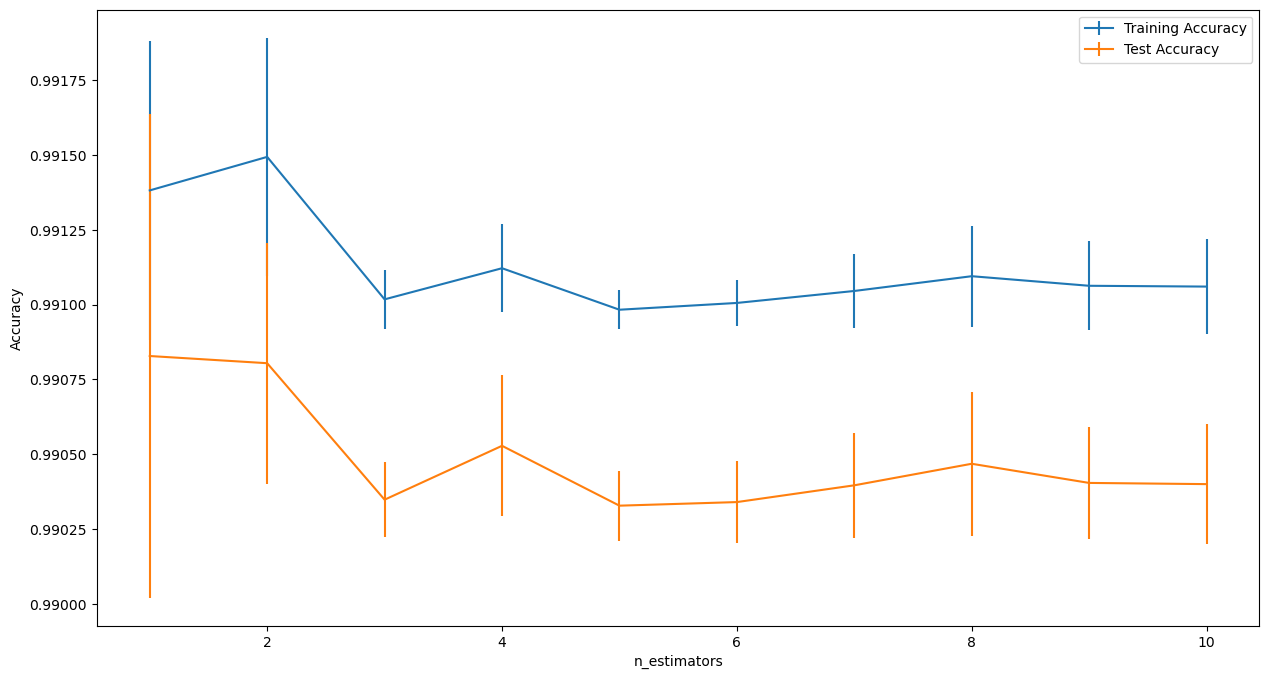

In [15]:
fig = plt.figure(figsize=(15,8))
plt.errorbar(n_estimators_settings, all_training.mean(axis=1), yerr=all_training.std(axis=1), label='Training Accuracy')
plt.errorbar(n_estimators_settings, all_test.mean(axis=1), yerr=all_test.std(axis=1), label='Test Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('n_estimators')
plt.legend()

best_n_est = np.argmax(all_test.mean(axis=1)) + 1
print(f'Highest Average Test Set Accuracy = {np.max(all_test.mean(axis=1)):.4%}')
print(f'Best n_estimator parameter = {best_n_est}')

In [16]:
df = pd.DataFrame({'features': X.columns, 'prob': rf_depth_estimators.feature_importances_})
df.sort_values(['prob'], ascending=False)[:10]

,features,prob
3,amt,0.363972
947,part_of_day_dinner,0.046818
502,job_Osteopath,0.034813
78,city_San Pablo,0.034011
76,city_San Jose del Monte,0.032266
241,job_Data processing manager,0.026768
46,city_Legazpi City,0.022750
703,job_Veterinary surgeon,0.020663
574,job_Quarry manager,0.020463
433,"job_Librarian, academic",0.019591


In [17]:
# save the model to a pickle file
pickle_file_name = "rf_depth_estimators.pkl"  

with open(pickle_file_name, 'wb') as file:  
    pickle.dump(rf_depth_estimators, file)

### Using '**max_depth**' and '**max_features**' parameters

In [23]:
all_training = pd.DataFrame()
all_test = pd.DataFrame()
max_depth_settings = range(1, 11)
for depth in tqdm(max_depth_settings):
    (X_train, X_test, y_train, y_test) = train_test_split(X, 
                                                    y, 
                                                    random_state=RNDM_STATE, 
                                                    test_size=0.25)
    
    training_accuracy = []
    test_accuracy = []
    max_feat_settings = [60, 80, 100, 120, 140]
    for feat_n in tqdm(max_feat_settings):
        rf_depth_feat = RandomForestClassifier(max_depth=depth, max_features=feat_n, random_state=RNDM_STATE)
        rf_depth_feat.fit(X_train, y_train)
        
        training_accuracy.append(rf_depth_feat.score(X_train, y_train))
        test_accuracy.append(rf_depth_feat.score(X_test, y_test))
        
    all_training[depth] = training_accuracy
    all_test[depth] = test_accuracy

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

In [24]:
display(all_training, all_test)

,1,2,3,4,5,6,7,8,9,10
0,0.990933,0.990933,0.990933,0.990933,0.990947,0.991053,0.991173,0.991533,0.991720,0.991987
1,0.990933,0.990933,0.990933,0.990933,0.991027,0.991293,0.991547,0.991827,0.991987,0.993293
2,0.990933,0.990933,0.990933,0.990960,0.991027,0.991320,0.991640,0.992027,0.992853,0.993667
3,0.990933,0.990933,0.990947,0.991200,0.991467,0.992040,0.993693,0.994053,0.994560,0.995520
4,0.990933,0.990933,0.990933,0.991160,0.991507,0.991773,0.993320,0.994067,0.994907,0.995413


,1,2,3,4,5,6,7,8,9,10
0,0.99024,0.99024,0.99024,0.99024,0.99024,0.99048,0.99056,0.99100,0.99108,0.99128
1,0.99024,0.99024,0.99024,0.99024,0.99036,0.99088,0.99100,0.99124,0.99140,0.99252
2,0.99024,0.99024,0.99024,0.99024,0.99040,0.99068,0.99112,0.99144,0.99224,0.99276
3,0.99024,0.99024,0.99028,0.99056,0.99080,0.99136,0.99312,0.99352,0.99396,0.99532
4,0.99024,0.99024,0.99028,0.99048,0.99092,0.99128,0.99284,0.99360,0.99432,0.99440


Highest Average Test Set Accuracy = 99.1940%
Best max_feat parameter = 4


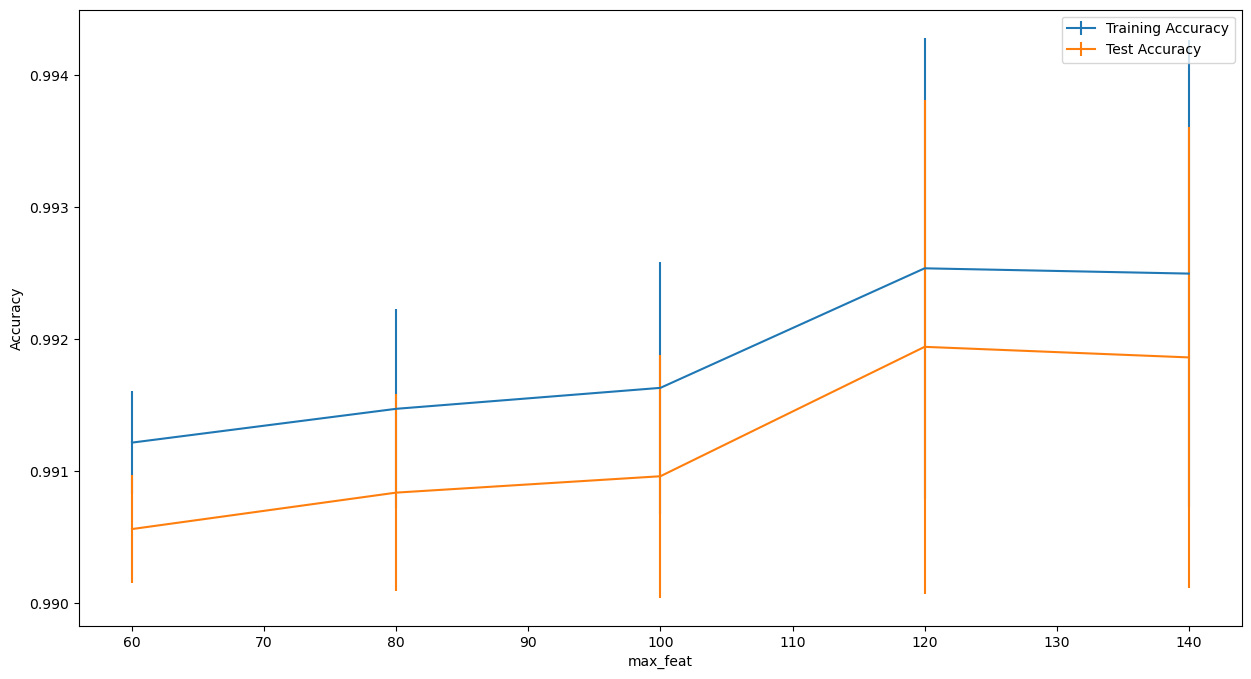

In [25]:
fig = plt.figure(figsize=(15,8))
plt.errorbar(max_feat_settings, all_training.mean(axis=1), yerr=all_training.std(axis=1), label='Training Accuracy')
plt.errorbar(max_feat_settings, all_test.mean(axis=1), yerr=all_test.std(axis=1), label='Test Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('max_feat')
plt.legend()

best_max_feat = np.argmax(all_test.mean(axis=1)) + 1
print(f'Highest Average Test Set Accuracy = {np.max(all_test.mean(axis=1)):.4%}')
print(f'Best max_feat parameter = {best_max_feat}')

In [26]:
df = pd.DataFrame({'features': X.columns, 'prob': rf_depth_feat.feature_importances_})
df.sort_values(['prob'], ascending=False)[:10]

,features,prob
3,amt,0.482177
947,part_of_day_dinner,0.059496
720,category_grocery_pos,0.041866
946,part_of_day_breakfast,0.029111
703,job_Veterinary surgeon,0.023300
524,job_Planning and development surveyor,0.023121
594,"job_Restaurant manager, fast food",0.015558
87,city_Tagum,0.014972
241,job_Data processing manager,0.014171
46,city_Legazpi City,0.012736


In [27]:
# save the model to a pickle file
pickle_file_name = "rf_depth_feat.pkl"  

with open(pickle_file_name, 'wb') as file:  
    pickle.dump(rf_depth_feat, file)